# Taller Chicas Poderosas / WWCode Santiago / Escuelita Chilota: datos servel
## Objetivos
Explorar los datos electorales del server, revisando el comportamiento de las votantes respecto al género de les candidates.

## Herramientas pricipales
 - pandas
 - geopandas

## Parte 1 cargado y limpiado de datos

In [1]:
# Importación de librerías
import os
import pandas as pd

In [67]:
# Configuramos pandas para mostrarnos hasta 50 columnas
pd.set_option('display.max_columns', 50)
#pd.set_option('display.max_rows', 100)

In [3]:
# Creamos un listado los archivos excel del directorio data
file_list = [file for file in os.scandir('./data') if file.name.split('.')[-1] == 'xlsx']

# creamos un acumulador vacio para los dataframes
dataframes = []

# Iteramos por la lista de archivos excels
for file in file_list:
    # cargamos el archivo actual
    df = pd.read_excel(file)
    # lo agregamos a nuestro acumulador
    dataframes.append(df)

# concatenamos nuestro listado de dataframes en uno solo
full_df = pd.concat(dataframes)

In [106]:
# Importamos librería de limpiado magico
# (si te sientes avanzada, anda a verla, no es tan magica solo codigo)
import helper
from importlib import reload
reload(helper);

# Creamos un nuevo df desde el anterior pero con el limpiado magico
df = helper.clear_df(full_df)

## Parte 2 exploración de datos

In [107]:
# Mostremos 12 filas al azar para hacernos una idea de con que estamos trabajando
df.sample(n=12)

,Tipo de Elección,Cargo,Año de Elección,Período,Región,Circunscripción Senatorial,Distrito,Comuna,Circunscripción Electoral,Nombre Circunscripción Electoral,Sexo Mesa,Candidato (a),Nombres,Apellido Paterno,Apellido Materno,Sexo,Electo,Sigla Partido,Lista,Votos Totales,Electo(a),Votación Presidencial,Provincia,Nombre Provincia,partido,electo,comuna,nombre,id_elección
25073,MUNICIPALES,CONCEJAL,1996,1996-2000,METROPOLITANA DE SANTIAGO,7.0,17.0,RENCA,151,RENCA,MUJER,MONSALVE ORTEGA CESAR,CESAR ANTONIO,MONSALVE,ORTEGA,HOMBRE,NaN,IND,B,439,NaN,NaN,NaN,NaN,independiente,NaN,Renca,CESAR ANTONIO MONSALVE ORTEGA,municipales 1996
67660,MUNICIPALES,CONCEJAL,2012,2012-2016,DE LA ARAUCANIA,14.0,48.0,LUMACO,392,PICHIPELLAHUEN,MIXTA,MARIA FULGERI VERGARA,MARIA ANGELICA,FULGERI,VERGARA,MUJER,NaN,UDI,H,7,NaN,NaN,NaN,NaN,udi,NaN,Lumaco,MARIA ANGELICA FULGERI VERGARA,municipales 2012
114,PARLAMENTARIA,SENADOR,1989,1990-1994,DE TARAPACA,1.0,1.0,PUTRE,5,BELEN,MUJER,DOUGNAC RODRIGUEZ FERNANDO,FERNANDO SERGIO,DOUGNAC,RODRIGUEZ,HOMBRE,NaN,INDEP,CI,15,NaN,NaN,NaN,NaN,independiente,NaN,Putre,FERNANDO SERGIO DOUGNAC RODRIGUEZ,parlamentaria 1989
62553,PARLAMENTARIA,DIPUTADO,2017,2018-2020,METROPOLITANA DE SANTIAGO,7.0,8.0,PUDAHUEL,665,CIUDAD DE LOS VALLES,MIXTA,MARGARIT BAHAMONDE PIA,PIA,MARGARIT,BAHAMONDE,MUJER,,UDI,P,29,NaN,NaN,NaN,NaN,udi,NaN,Pudahuel,PIA MARGARIT BAHAMONDE,parlamentaria 2017
1075,MUNICIPALES,ALCALDE,2004,2004-2008,DE VALPARAISO,5.0,11.0,PANQUEHUE,86,PANQUEHUE,HOMBRE,VASQUEZ CHAHUAN JUANA,JUANA MARIA,VASQUEZ,CHAHUAN,MUJER,NaN,IND,B,592,NaN,NaN,NaN,NaN,independiente,NaN,Panquehue,JUANA MARIA VASQUEZ CHAHUAN,municipales 2004
2308,PRESIDENCIAL,PRESIDENTE,1989,1990 a 1994,DEL BIOBIO,NaN,NaN,NINHUE,NINHUE,NaN,MUJER,VOTOS NULOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,NaN,UNICA VOTACIÓN,33.0,ÑUBLE,Nulos,NaN,Ninhue,NaN,presidencial 1989
71893,PARLAMENTARIA,DIPUTADO,2017,2018-2020,DEL BIOBIO,10.0,21.0,LOTA,351,LOTA,MIXTA,BOSSELIN ZUÑIGA CARLA,CARLA,BOSSELIN,ZUÑIGA,MUJER,,IGUALDAD,G,140,NaN,NaN,NaN,NaN,pi,NaN,Lota,CARLA BOSSELIN ZUÑIGA,parlamentaria 2017
6028,PARLAMENTARIA,DIPUTADO,1989,1990-1994,DE LA ARAUCANIA,14.0,49.0,VICTORIA,388,VICTORIA,HOMBRE,VOTOS NULOS,,,,,NaN,,NaN,159,NaN,NaN,NaN,NaN,Nulos,NaN,Victoria,,parlamentaria 1989
1682,PRESIDENCIAL,PRESIDENTE,1989,1990 a 1994,DEL MAULE,NaN,NaN,LONGAVI,LONGAVI,NaN,HOMBRE,PATRICIO AYLWIN,PATRICIO,AYLWIN,AZOCAR,HOMBRE,NaN,DC,NaN,3745,SI,UNICA VOTACIÓN,31.0,LINARES,pdc,SI,Longaví,PATRICIO AYLWIN AZOCAR,presidencial 1989
19350,PARLAMENTARIA,SENADOR,2005,2006-2014,DE COQUIMBO,4.0,9.0,PUNITAQUI,63,PUNITAQUI,HOMBRE,AGUILERA GONZALEZ LUIS,LUIS EDUARDO,AGUILERA,GONZALEZ,HOMBRE,NaN,PCCH,C,157,NaN,NaN,NaN,NaN,pc,NaN,Punitaqui,LUIS EDUARDO AGUILERA GONZALEZ,parlamentaria 2005


In [108]:
# Veamos las columnas (más tarde haremos copiar/pegar desde acá)
df.columns

Index(['Tipo de Elección', 'Cargo', 'Año de Elección', 'Período', 'Región',
       'Circunscripción Senatorial', 'Distrito', 'Comuna',
       'Circunscripción Electoral', 'Nombre Circunscripción Electoral',
       'Sexo Mesa', 'Candidato (a)', 'Nombres', 'Apellido Paterno',
       'Apellido Materno', 'Sexo', 'Electo', 'Sigla Partido', 'Lista',
       'Votos Totales', 'Electo(a)', 'Votación Presidencial', 'Provincia',
       'Nombre Provincia', 'partido', 'electo', 'comuna', 'nombre',
       'id_elección'],
      dtype='object')

In [109]:
# Veamos que etiquetas se usan para genderificar las mesas
df['Sexo Mesa'].value_counts()

MUJER     113881
HOMBRE    113519
MIXTA     104846
Name: Sexo Mesa, dtype: int64

In [110]:
# ¿Y cuales serían las que excluiriamos?
df.query('`Sexo Mesa` == "MIXTA"').id_elección.value_counts()

municipales 2016      29377
parlamentaria 2017    28745
municipales 2012      20942
presidencial 2017      8764
presidencial 2013      8580
parlamentaria 2013     8438
Name: id_elección, dtype: int64

## Parte 3 selección de datos a trabajar

In [111]:
generos = ['MUJER', 'HOMBRE']

votos_con_genero = df.query('`Sexo Mesa` in @generos')
votos_con_genero

,Tipo de Elección,Cargo,Año de Elección,Período,Región,Circunscripción Senatorial,Distrito,Comuna,Circunscripción Electoral,Nombre Circunscripción Electoral,Sexo Mesa,Candidato (a),Nombres,Apellido Paterno,Apellido Materno,Sexo,Electo,Sigla Partido,Lista,Votos Totales,Electo(a),Votación Presidencial,Provincia,Nombre Provincia,partido,electo,comuna,nombre,id_elección
0,MUNICIPALES,CONCEJAL,2004,2004-2008,DE TARAPACA,1.0,1.0,ARICA,1,ARICA,HOMBRE,ALARCON RODRIGUEZ ROLANDO ELOY,ROLANDO ELOY,ALARCON,RODRIGUEZ,HOMBRE,NaN,IND,E,269,NaN,NaN,NaN,NaN,independiente,NaN,Arica,ROLANDO ELOY ALARCON RODRIGUEZ,municipales 2004
1,MUNICIPALES,CONCEJAL,2004,2004-2008,DE TARAPACA,1.0,1.0,ARICA,1,ARICA,HOMBRE,ANTEMAN ARAYA JUANA,JUANA CONSUELO,ANTEMAN,ARAYA,MUJER,NaN,PS,C,687,NaN,NaN,NaN,NaN,ps,NaN,Arica,JUANA CONSUELO ANTEMAN ARAYA,municipales 2004
2,MUNICIPALES,CONCEJAL,2004,2004-2008,DE TARAPACA,1.0,1.0,ARICA,1,ARICA,HOMBRE,ARANCIBIA JAIME,JAIME,ARANCIBIA,,HOMBRE,SI,UDI,B,2419,NaN,NaN,NaN,NaN,udi,NaN,Arica,JAIME ARANCIBIA,municipales 2004
3,MUNICIPALES,CONCEJAL,2004,2004-2008,DE TARAPACA,1.0,1.0,ARICA,1,ARICA,HOMBRE,ARENAS SANDOVAL MIRIAM,MIRIAM DE LAS MERCEDES,ARENAS,SANDOVAL,MUJER,NaN,PDC,C,1159,NaN,NaN,NaN,NaN,pdc,NaN,Arica,MIRIAM DE LAS MERCEDES ARENAS SANDOVAL,municipales 2004
4,MUNICIPALES,CONCEJAL,2004,2004-2008,DE TARAPACA,1.0,1.0,ARICA,1,ARICA,HOMBRE,BADILLA QUINTEROS ROBERTO,ROBERTO GASTON,BADILLA,QUINTEROS,HOMBRE,NaN,PH,A,290,NaN,NaN,NaN,NaN,ph,NaN,Arica,ROBERTO GASTON BADILLA QUINTEROS,municipales 2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50795,PARLAMENTARIA,DIPUTADO,2009,2010-2014,DE MAGALLANES Y ANTARTICA CH.,19.0,60.0,TORRES DEL PAINE,504,TORRES DEL PAINE (C. CASTILLO),MUJER,QUILAHUILQUE CHAVEZ ANA,ANA ISABEL,QUILAHUILQUE,CHAVEZ,MUJER,NaN,PRI,D,2,NaN,NaN,NaN,NaN,prdi,NaN,Torres del Paine,ANA ISABEL QUILAHUILQUE CHAVEZ,parlamentaria 2009
50796,PARLAMENTARIA,DIPUTADO,2009,2010-2014,DE MAGALLANES Y ANTARTICA CH.,19.0,60.0,TORRES DEL PAINE,504,TORRES DEL PAINE (C. CASTILLO),MUJER,MARINOVIC SOLO DE ZALDIVAR MIODRAG,MIODRAG,MARINOVIC,SOLO DE ZALDIVAR,HOMBRE,SI,INDEP,G,96,NaN,NaN,NaN,NaN,independiente,NaN,Torres del Paine,MIODRAG MARINOVIC SOLO DE ZALDIVAR,parlamentaria 2009
50797,PARLAMENTARIA,DIPUTADO,2009,2010-2014,DE MAGALLANES Y ANTARTICA CH.,19.0,60.0,TORRES DEL PAINE,504,TORRES DEL PAINE (C. CASTILLO),MUJER,TAPIA OGEDA SERGIO NELSON,SERGIO NELSON,TAPIA,OGEDA,HOMBRE,NaN,INDEP,G,4,NaN,NaN,NaN,NaN,independiente,NaN,Torres del Paine,SERGIO NELSON TAPIA OGEDA,parlamentaria 2009
50798,PARLAMENTARIA,DIPUTADO,2009,2010-2014,DE MAGALLANES Y ANTARTICA CH.,19.0,60.0,TORRES DEL PAINE,504,TORRES DEL PAINE (C. CASTILLO),MUJER,VOTOS NULOS,,,,,NaN,,NaN,17,NaN,NaN,NaN,NaN,Nulos,NaN,Torres del Paine,,parlamentaria 2009


In [112]:
# Veamos cuales son los cargos
votos_con_genero['Cargo'].unique()

array(['CONCEJAL', 'ALCALDE', 'SENADOR', 'PRESIDENTE', 'DIPUTADO'],
      dtype=object)

## Parte 3.5 Reordenamos datos para explorar lo que nos interesa

In [114]:
# Creamos un acumulador vacio
data = []

# iteramos por elecciones y sus datos
for id_elección, elección_df in votos_con_genero.groupby('id_elección'):
    # iteramos por los cargos + comunas, de esos datos
    for (cargo, comuna), cargo_df in elección_df.groupby(['Cargo', 'comuna']):
        # Candidaturas
        #
        # buscamos todas las candidatas de el grupo en el que estamos (elección+cargo+comuna)
        candidatas = cargo_df.query('Sexo == "MUJER"').nombre.unique()
        # contamos el total de candidatas
        total_candidatas = len(candidatas)
        
        # Ahora lo mismo para los hombres
        candidatos = cargo_df.query('Sexo == "HOMBRE"').nombre.unique()
        total_candidatos = len(candidatos)
        
        # Calculamos la fracción (porcentaje) de mujeres del total
        proporción_candidatas = total_candidatas /  (total_candidatas + total_candidatos)
        
        # Votos
        #
        # Contamos votos totales para cada combinación
        votos_mujeres_por_mujeres = cargo_df.query('`Sexo Mesa` in "MUJER"').query('Sexo == "MUJER"')['Votos Totales'].sum()
        votos_mujeres_por_hombres = cargo_df.query('`Sexo Mesa` in "MUJER"').query('Sexo == "HOMBRE"')['Votos Totales'].sum()
        votos_hombres_por_mujeres = cargo_df.query('`Sexo Mesa` in "HOMBRE"').query('Sexo == "MUJER"')['Votos Totales'].sum()
        votos_hombres_por_hombres = cargo_df.query('`Sexo Mesa` in "HOMBRE"').query('Sexo == "HOMBRE"')['Votos Totales'].sum()
        
        # Mujeres votando por mujeres
        proporción_votos_mujeres = votos_mujeres_por_mujeres /  (votos_mujeres_por_mujeres + votos_mujeres_por_hombres)
        # Hombres votando por mujeres
        proporción_votos_hombres = votos_hombres_por_mujeres /  (votos_hombres_por_mujeres + votos_hombres_por_hombres)
        # Diferencia
        proporción_votos_delta = proporción_votos_mujeres - proporción_votos_hombres
        
        # Creamos una fila con todos estos datos maravillosos
        row = [id_elección, cargo, total_candidatas, total_candidatos, candidatas, candidatos, proporción_candidatas,
              votos_mujeres_por_mujeres, votos_mujeres_por_hombres, votos_hombres_por_mujeres, votos_hombres_por_hombres,
              proporción_votos_mujeres, proporción_votos_hombres, proporción_votos_delta, comuna]
        # Le agregamos esa fila a nuestro acumulador
        data.append(row)
        
# Preparamos un listado de columnas      
columnas = ['id_elección', 'cargo', 'total_candidatas', 'total_candidatos', 'candidatas', 'candidatos', 'proporción_candidatas',
            'votos_mujeres_por_mujeres', 'votos_mujeres_por_hombres', 'votos_hombres_por_mujeres', 'votos_hombres_por_hombres',
            'proporción_votos_mujeres', 'proporción_votos_hombres', 'proporción_votos_delta', 'Comuna']

# Convertimos nuestro acumulador salvaje, en una elegante tabla
data = pd.DataFrame(data, columns=columnas).sort_values(['proporción_votos_delta'], ascending=False)
data

<ipython-input-114-5f3f5dd1d755>:21: RuntimeWarning: invalid value encountered in long_scalars
  proporción_votos_hombres = votos_hombres_por_mujeres /  (votos_hombres_por_mujeres + votos_hombres_por_hombres)
<ipython-input-114-5f3f5dd1d755>:20: RuntimeWarning: invalid value encountered in long_scalars
  proporción_votos_mujeres = votos_mujeres_por_mujeres /  (votos_mujeres_por_mujeres + votos_mujeres_por_hombres)


,id_elección,cargo,total_candidatas,total_candidatos,candidatas,candidatos,proporción_candidatas,votos_mujeres_por_mujeres,votos_mujeres_por_hombres,votos_hombres_por_mujeres,votos_hombres_por_hombres,proporción_votos_mujeres,proporción_votos_hombres,proporción_votos_delta,Comuna
4245,parlamentaria 2005,DIPUTADO,3,4,"[LIDIA MAGDALENA AMARALES OSORIO, CAROLINA GOI...","[JAIME ALEJANDRO AGURTO TORRES, RODRIGO ALEJAN...",0.428571,164,105,178,257,0.609665,0.409195,0.200470,Cabo de Hornos
7237,presidencial 2006,PRESIDENTE,1,1,[MICHELLE BACHELET JERIA],[SEBASTIAN PIÑERA ECHENIQUE],0.500000,123,110,33,67,0.527897,0.330000,0.197897,Río Verde
1043,municipales 2004,CONCEJAL,10,8,"[ISABEL CAROLINA CASELLI BENAVENTE, MARILY DEL...","[IVAN FERNANDO ALMONACID BARRIENTOS, VICTOR HE...",0.555556,208,119,231,266,0.636086,0.464789,0.171297,Cabo de Hornos
1990,municipales 2008,CONCEJAL,9,11,"[XIMENA ANDREA ABARZUA VILLEGAS, SOLEDAD DEL C...","[MARIO ALARCON BARRIENTOS, JUAN ANTONIO ALMONA...",0.450000,112,36,162,114,0.756757,0.586957,0.169800,Río Verde
1733,municipales 2008,CONCEJAL,10,13,"[GLORIA DEL CARMEN ARIAS ALLENDE, ISABEL CAROL...","[MANUEL EDUARDO AGUILANTE BARRIENTOS, VICTOR H...",0.434783,209,142,227,301,0.595442,0.429924,0.165517,Cabo de Hornos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,parlamentaria 1997,DIPUTADO,2,7,"[SILVIA DEL CARME ZAMORANO SAN MARTIN, SILVIA ...","[ALBERTO FERNANDO VEGA NUÑEZ, JUAN ALFONSO MA ...",0.222222,0,0,678,6081,NaN,0.100311,NaN,Chimbarongo
3525,parlamentaria 1997,DIPUTADO,0,6,[],"[JUAN CARLOS COSMELLI BASSOLS, MIGUEL LUIS FLO...",0.000000,0,0,0,126,NaN,0.000000,NaN,Tortel
4809,parlamentaria 2009,DIPUTADO,1,7,[JULIETA FLORENTINA CRUZ FIGUEROA],"[VICTOR MANUEL REBOLLEDO GONZALEZ, ALBERTO IVA...",0.125000,469,5773,0,0,0.075136,NaN,NaN,Caldera
5024,parlamentaria 2009,DIPUTADO,2,5,"[ADRIANA BLANCA CRISTINA MUÑOZ D'ALBORA, CATHE...","[FRANCISCO RENAN FUENTEALBA VILDOSOLA, JUAN EN...",0.285714,0,0,1668,3382,NaN,0.330297,NaN,Punitaqui


In [115]:
# Agrupemos por comunas
data.groupby('Comuna').mean().sort_values('proporción_votos_delta', ascending=False)

,total_candidatas,total_candidatos,proporción_candidatas,votos_mujeres_por_mujeres,votos_mujeres_por_hombres,votos_hombres_por_mujeres,votos_hombres_por_hombres,proporción_votos_mujeres,proporción_votos_hombres,proporción_votos_delta
Comuna,,,,,,,,,,
Osorno,1.304348,6.652174,0.155590,5354.739130,29931.869565,4461.347826,27590.739130,0.156598,0.137437,0.019161
Río Verde,1.652174,4.478261,0.254762,37.956522,78.086957,63.695652,125.347826,0.280604,0.264014,0.016590
Andacollo,1.043478,6.173913,0.127587,489.260870,2762.739130,428.608696,2647.173913,0.154234,0.138029,0.016205
Tortel,1.000000,5.125000,0.126943,12.666667,90.958333,11.875000,115.583333,0.106649,0.087889,0.014938
Santa Cruz,1.260870,6.478261,0.157683,1300.043478,6961.478261,1128.391304,6558.130435,0.163620,0.148949,0.014671
...,...,...,...,...,...,...,...,...,...,...
Curacaví,1.956522,5.478261,0.225656,870.391304,4722.826087,890.173913,4420.956522,0.150143,0.161687,-0.011544
Ollagüe,1.391304,5.043478,0.181116,40.869565,165.260870,44.521739,166.391304,0.192326,0.204688,-0.012362
Quilicura,2.043478,5.956522,0.216753,4509.347826,12804.217391,4131.913043,10500.956522,0.261502,0.274111,-0.012609


## Parte 4 integramos vectores de comunas para hacer graficos lindos

In [116]:
import geopandas as gpd


comunas = gpd.read_file('data/Comunas')
comunas

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry
0,48,170038.624165,16,8,6204,6,9.685774e+08,206184.271675,Región del Libertador Bernardo O'Higgins,Marchigüe,Cardenal Caro,"POLYGON ((-7992818.789 -4056669.319, -7992731...."
1,29,125730.104795,15,8,6102,6,4.157446e+08,151911.576827,Región del Libertador Bernardo O'Higgins,Codegua,Cachapoal,"POLYGON ((-7831651.813 -4022443.109, -7831596...."
2,30,63026.084422,15,8,6103,6,1.448565e+08,76355.326122,Región del Libertador Bernardo O'Higgins,Coinco,Cachapoal,"POLYGON ((-7892616.357 -4060673.364, -7892621...."
3,31,89840.903562,15,8,6104,6,3.256572e+08,108874.623150,Región del Libertador Bernardo O'Higgins,Coltauco,Cachapoal,"POLYGON ((-7906457.717 -4051723.734, -7906266...."
4,78,122626.493264,23,11,9121,9,6.990727e+08,156680.410681,Región de La Araucanía,Cholchol,Cautín,"POLYGON ((-8121756.186 -4645860.295, -8121644...."
...,...,...,...,...,...,...,...,...,...,...,...,...
341,255,130240.555805,19,10,16305,16,8.751006e+08,160459.137929,Región de Ñuble,San Nicolás,Punilla,"POLYGON ((-8041950.854 -4349201.562, -8041735...."
342,253,311061.932415,19,10,16304,16,2.393007e+09,388109.613857,Región de Ñuble,San Fabián,Punilla,"POLYGON ((-7931328.549 -4363544.179, -7931320...."
343,245,159257.906431,19,10,16303,16,7.638173e+08,195593.933727,Región de Ñuble,Ñiquén,Punilla,"POLYGON ((-8026032.185 -4319505.012, -8025933...."
344,243,157467.049667,19,10,16104,16,1.044405e+09,196962.664313,Región de Ñuble,El Carmen,Ñuble,"POLYGON ((-7986315.104 -4415272.935, -7986309...."


In [117]:
# Unimos los vectores de la bnc con los datos del servel

geovotos = comunas.merge(data.groupby('Comuna').mean(), how='left', on='Comuna')

In [118]:
# A ver que regiones existen
geovotos.Region.unique()

array(["Región del Libertador Bernardo O'Higgins",
       'Región de La Araucanía', 'Región Metropolitana de Santiago',
       'Región de Los Lagos', 'Región de Los Ríos', 'Región del Maule',
       'Región de Coquimbo', 'Región de Magallanes y Antártica Chilena',
       'Zona sin demarcar', 'Región de Valparaíso', 'Región del Bío-Bío',
       'Región de Aysén del Gral.Ibañez del Campo', 'Región de Tarapacá',
       'Región de Arica y Parinacota', 'Región de Antofagasta',
       'Región de Ñuble', 'Región de Atacama'], dtype=object)

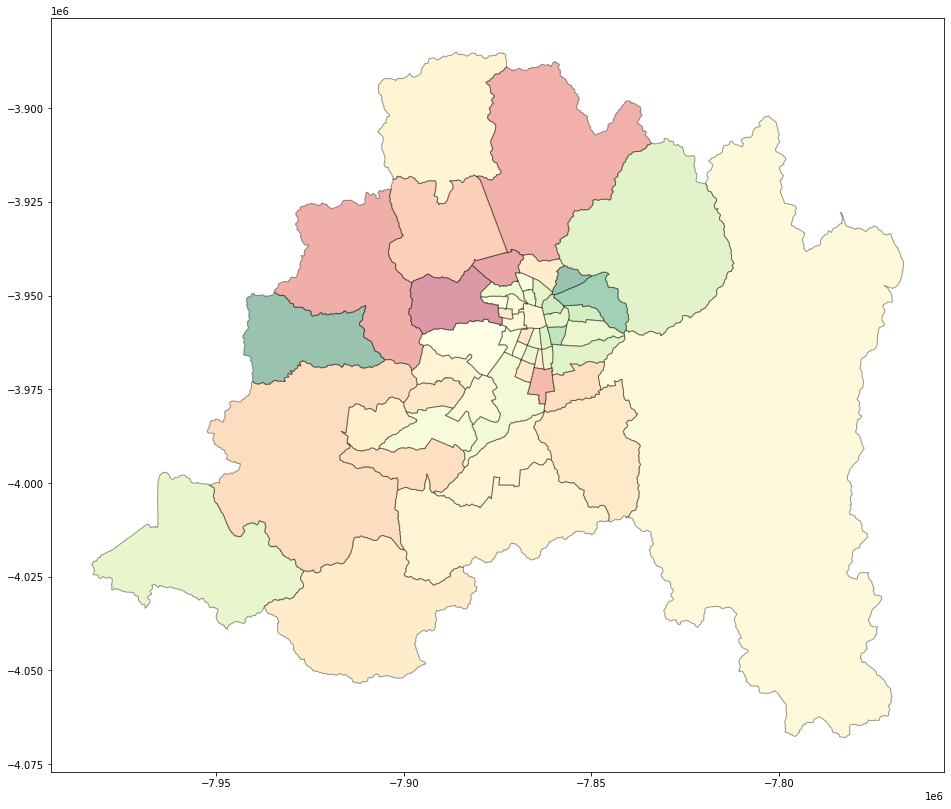

In [129]:
# importamos una paleta verde a rojo
from palettable.colorbrewer.diverging import RdYlGn_11

# buscamos la región metropolitana
rm = geovotos.query('Region == "Región Metropolitana de Santiago"').to_crs('epsg:3857')

# ploteamos el delta de votos
ax = rm.plot(column='proporción_votos_delta', figsize=(16,20), alpha=0.4, edgecolor='k', cmap=RdYlGn_11.mpl_colormap)

/Users/v/repositories/taller-chicaspoderosas-wwcode/helper.py:5: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
/Users/v/opt/anaconda3/envs/geo38/lib/python3.8/site-packages/contextily/tile.py:265: FutureWarning: The url format using 'tileX', 'tileY', 'tileZ' as placeholders is deprecated. Please use '{x}', '{y}', '{z}' instead.
  warnings.warn(


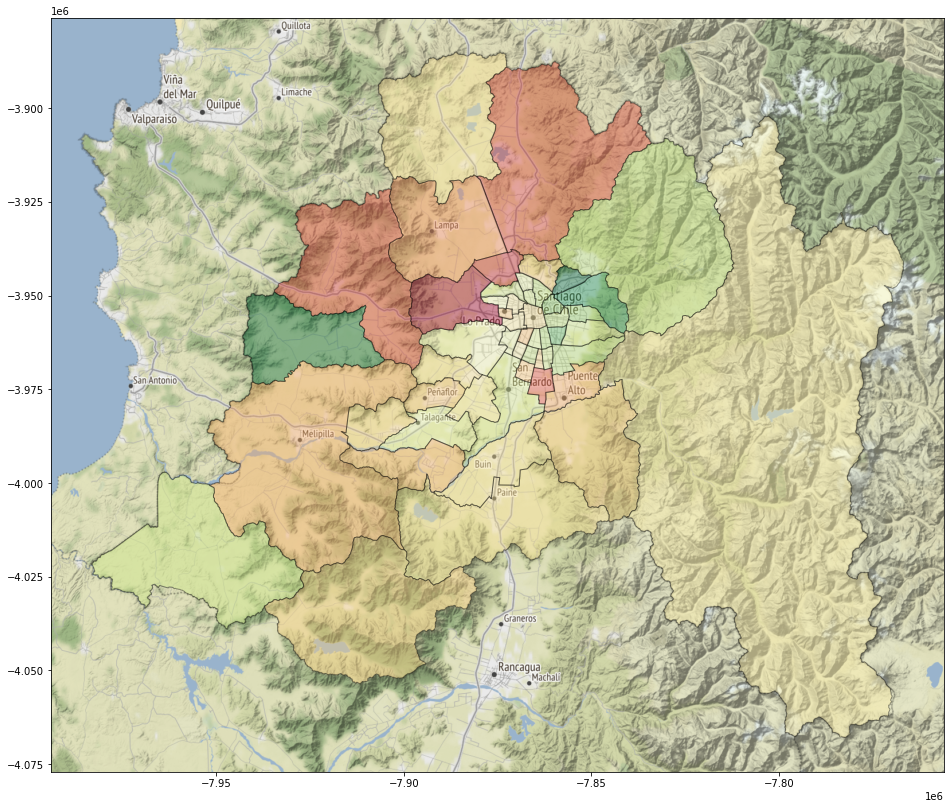

In [131]:
# creamos el mismo plot anterior
ax = rm.plot(column='proporción_votos_delta', figsize=(16,20), alpha=0.4, edgecolor='k', cmap=RdYlGn_11.mpl_colormap)

# y le agregamos un fondo contextual
helper.add_basemap(ax, zoom=10)

<AxesSubplot:>

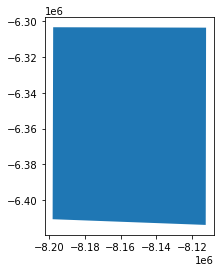

In [133]:
# que sería esa región nueva?
geovotos.query('Region == "Zona sin demarcar"').plot()

## Parte 5 generamos un plot por región

In [152]:
from matplotlib import pyplot as plt

for región in geovotos.Region.unique():
    if región != 'Zona sin demarcar':
        df_región = geovotos.query('Region == @región').to_crs('epsg:3857')
        # Fix para Región de Valparaíso
        if 'Region == Región de Valparaíso':
            islas = ['Juan Fernández', 'Isla de Pascua']
            df_región = df_región.query('Comuna not in @islas')
        ax = df_región.plot(column='proporción_votos_delta', figsize=(25,25), alpha=0.4, edgecolor='k', cmap=RdYlGn_11.mpl_colormap)
        helper.add_basemap(ax, zoom=10)
        title = f'Diferencia de mujeres y hombres votando por mujeres en {región} 1989-2012'
        ax.tick_params(bottom=False, left=False)
        ax.set(xticklabels=[], yticklabels=[])
        ax.set(title=title)
        for spine in ax.spines:
            ax.spines[spine].set_visible(False)
        file_name = f'reports/{title}.png'
        plt.savefig(file_name, bbox_inches='tight')
        plt.close()

/Users/v/repositories/taller-chicaspoderosas-wwcode/helper.py:5: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
/Users/v/opt/anaconda3/envs/geo38/lib/python3.8/site-packages/contextily/tile.py:265: FutureWarning: The url format using 'tileX', 'tileY', 'tileZ' as placeholders is deprecated. Please use '{x}', '{y}', '{z}' instead.
  warnings.warn(
/Users/v/repositories/taller-chicaspoderosas-wwcode/helper.py:5: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
/Users/v/opt/anaconda3/envs/geo38/lib/python3.8/site-packages/contextily/tile.py:265: FutureWarning: The url format using 'tileX', 'tileY', 'tileZ' as placeholders is deprecated. Please use '{x}', '{y}', '{z}' instead.
  warnings.warn(
/Users/v/repositories/taller-chicaspoderosas-wwcode/helper.py: